In [1]:
import numpy as np
import bokeh.io
import bokeh.plotting

#from scipy.integrate import ode
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


bokeh.io.output_notebook()

Loading BokehJS ...

# Model

$$
\frac{dprey}{dt} = \alpha * prey - \beta * prey * predator
$$
$$
\frac{dpredator}{dt} = \delta * \beta * predator * prey - \gamma * predator
$$

In [2]:
def lv_model(T, state, *params):
    prey, pred = state
    alpha, beta, delta, gamma = params
    
    
    dprey = alpha * prey - beta * pred * prey
    dpred = delta * beta * pred * prey - gamma * pred
        
    dstate_dt = [dprey, dpred]
    
    return dstate_dt

# Simulations

In [3]:
def simulate_lv(t_end, alpha, beta, delta, gamma, plot_on = False):
    params =  alpha, beta, delta, gamma
    #print(params)

    # set simulation parameters
    N = t_end*10 # number of samples

    T = np.linspace(0, t_end, N)

    # set initial conditions
    Y0 = np.zeros(2) 
    Y0[0] = 10
    Y0[1] = 1

    sol = solve_ivp(lv_model, [0, t_end], Y0, args=params, dense_output=True)
    z = sol.sol(T)
    if plot_on:
        plt.plot(T, z.T)
        plt.legend(['prey', 'predator'])
        plt.xlabel('Time')
        plt.ylabel('Density')    
        plt.show()
    
    return T, z.T[:,0], z.T[:,1]

# Parameters and tests

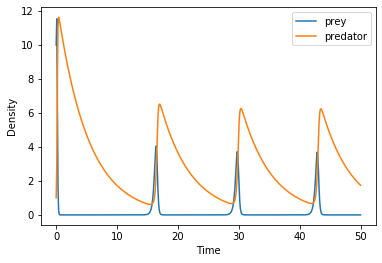

In [4]:
t_end = 50 # simulation duration

alpha = 5
beta = 2
delta = 0.5
gamma = 0.2

t, prey, predator = simulate_lv(t_end, alpha, beta, delta, gamma, plot_on=True)

# Bokeh

## Sliders

In [5]:
alpha_slider = bokeh.models.Slider(title="alpha", start=1, end=10, step=0.1, value=alpha)
beta_slider = bokeh.models.Slider(title="beta", start=1, end=10, step=0.1, value=beta)
delta_slider = bokeh.models.Slider(title="gamma", start=0, end=10, step=0.1, value=delta)
gamma_slider = bokeh.models.Slider(title="delta", start=0, end=10, step=0.1, value=gamma)

## Plotting

In [6]:
cds = bokeh.models.ColumnDataSource(
    dict(t=t, prey=prey, predator=predator)
)

fig = bokeh.plotting.figure(
    frame_width=800,
    frame_height=400,
    x_axis_label="Time",
    y_axis_label="Density",
    x_range=[0, 50.0],
)

colors = bokeh.palettes.d3["Category20"][6]
prey_line = fig.line(source=cds, x="t", y="prey", line_width=2, color=colors[4])
predator_line = fig.line(source=cds, x="t", y="predator", line_width=2, color=colors[2])

legend_items = [
    ("prey", [prey_line]),
    ("predator", [predator_line])]
legend = bokeh.models.Legend(items=legend_items)

fig.add_layout(legend, "right")
    
layout = bokeh.layouts.column(
    bokeh.layouts.row(
        alpha_slider,        
        beta_slider,
        delta_slider,
        gamma_slider,
        width=575,
    ),
    bokeh.layouts.Spacer(height=10),
    fig
)


def _callback(attr, old, new):
    t, prey, predator = simulate_lv(50, alpha_slider.value, beta_slider.value, delta_slider.value, gamma_slider.value)
    cds.data = dict(t=t, prey=prey, predator=predator)  
    
    

alpha_slider.on_change("value", _callback)
beta_slider.on_change("value", _callback)
delta_slider.on_change("value", _callback)
gamma_slider.on_change("value", _callback)


# Demo

In [7]:
# Build the app
def lv_app(doc):
    doc.add_root(layout)


bokeh.io.show(lv_app, notebook_url="localhost:8888")
